/tmp/ipython-input-6-3637849183.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='coolwarm')


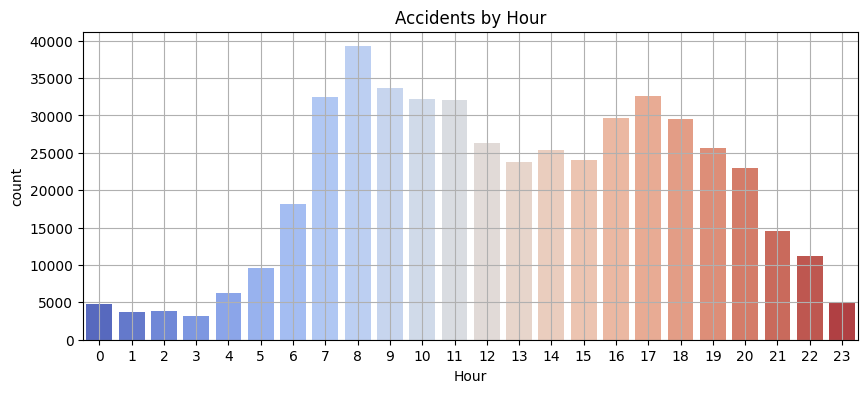

/tmp/ipython-input-6-3637849183.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekday', order=order, palette='Spectral')


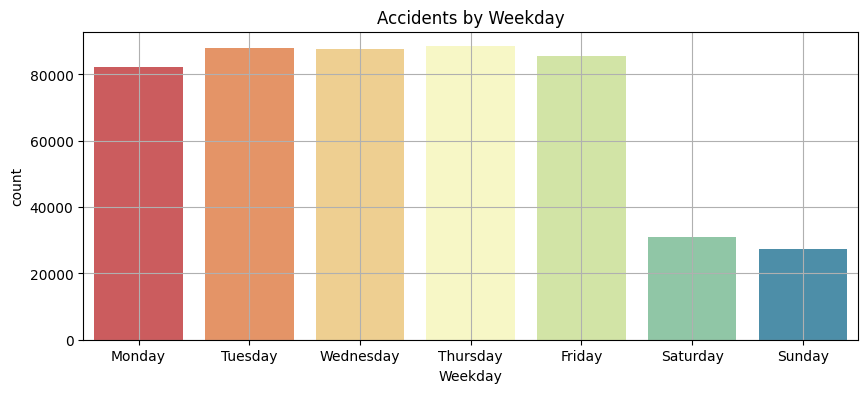

/tmp/ipython-input-6-3637849183.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.values, y=top_weather.index, palette='mako')


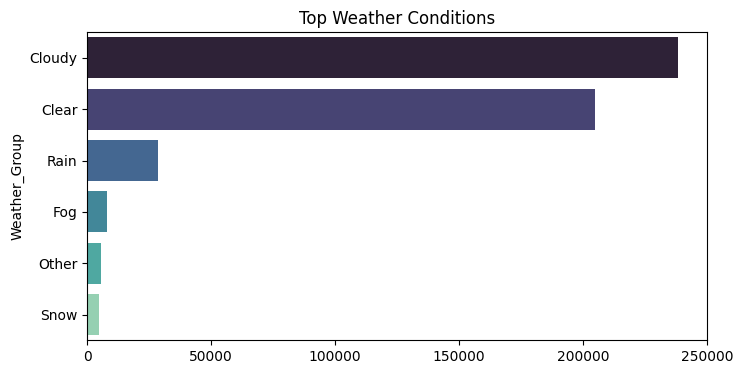

<Figure size 800x600 with 0 Axes>

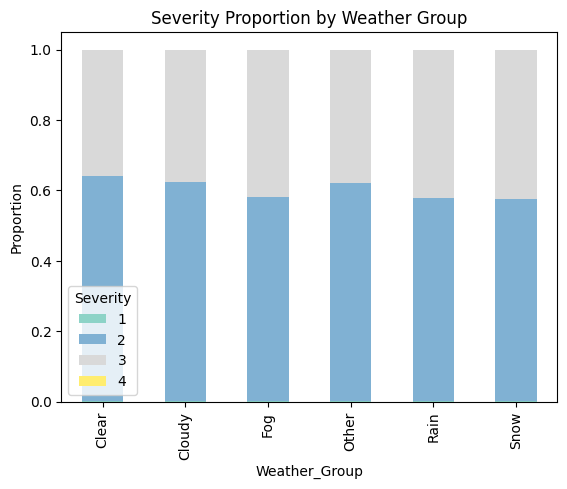

/tmp/ipython-input-6-3637849183.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Severity', palette='magma')


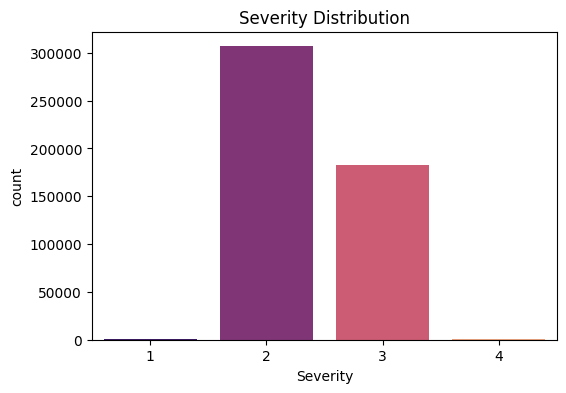

/tmp/ipython-input-6-3637849183.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


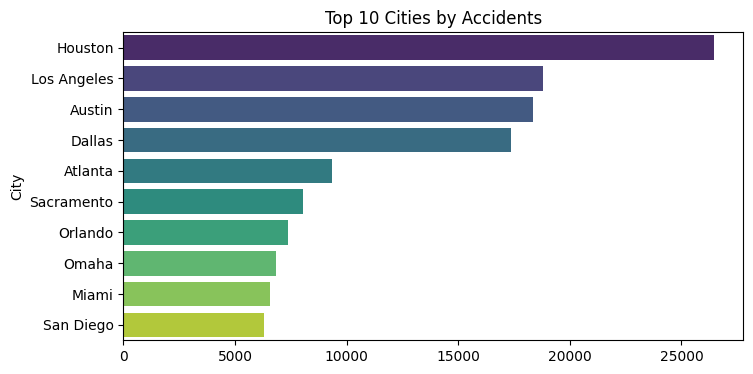

/tmp/ipython-input-6-3637849183.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='cool')


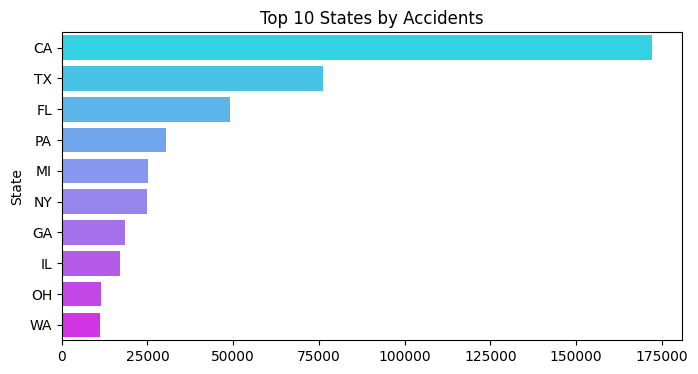

In [ ]:
#Install required libraries
!pip install plotly --quiet

#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Load only first 500,000 rows to prevent RAM crash
df = pd.read_csv("US_Accidents_March23.csv", nrows=500000)

#Preprocessing
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()
df.dropna(subset=['Start_Lat', 'Start_Lng', 'Severity', 'Weather_Condition'], inplace=True)

def group_weather(w):
    if pd.isna(w): return 'Other'
    w = w.lower()
    if 'rain' in w or 'shower' in w: return 'Rain'
    if 'snow' in w or 'sleet' in w: return 'Snow'
    if 'clear' in w: return 'Clear'
    if 'cloud' in w or 'overcast' in w: return 'Cloudy'
    if 'fog' in w or 'haze' in w: return 'Fog'
    return 'Other'

df['Weather_Group'] = df['Weather_Condition'].apply(group_weather)

# EDA Visualizations

# Accidents by Hour
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Hour', palette='coolwarm')
plt.title('Accidents by Hour'); plt.grid(); plt.show()

# Accidents by Weekday
plt.figure(figsize=(10,4))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data=df, x='Weekday', order=order, palette='Spectral')
plt.title('Accidents by Weekday'); plt.grid(); plt.show()

# Weather Conditions
plt.figure(figsize=(8,4))
top_weather = df['Weather_Group'].value_counts()
sns.barplot(x=top_weather.values, y=top_weather.index, palette='mako')
plt.title('Top Weather Conditions'); plt.show()

# Weather vs Severity
plt.figure(figsize=(8,6))
grp = df.groupby(['Weather_Group','Severity']).size().unstack(fill_value=0)
norm = grp.div(grp.sum(axis=1), axis=0)
norm.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Severity Proportion by Weather Group'); plt.ylabel('Proportion'); plt.show()

# Severity Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Severity', palette='magma')
plt.title('Severity Distribution'); plt.show()

# Top 10 Cities
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities by Accidents'); plt.show()

# Top 10 States
top_states = df['State'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_states.values, y=top_states.index, palette='cool')
plt.title('Top 10 States by Accidents'); plt.show()

# Accident Heatmap (with sample of 20k rows)
sample = df.sample(20000, random_state=42)

fig = px.density_mapbox(sample,
                        lat='Start_Lat',
                        lon='Start_Lng',
                        z='Severity',
                        radius=5,
                        center=dict(lat=39.5, lon=-98.35),
                        zoom=3,
                        mapbox_style='open-street-map',
                        title='US Accident Hotspot Density')
fig.show()

